<img src="Topic.png" width="1000">

____________

<img src="Guidelines.png" width="800">

____________

Below is the flowchart of the data analysis steps:

<img src="Steps.png" width="350">

____________

# Install Packages

In [84]:
#pip install factor_analyzer

In [2]:
#pip install pingouin

In [3]:
#pip install semopy

In [4]:
#pip install graphviz

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import math 
import semopy

# Import Data

In [6]:
import csv

data0 = pd.read_csv('RawData.csv')
data = data0.dropna()
data.shape

(1110, 28)

In [7]:
#Sum of Factors
PEOU=pd.DataFrame(data[['PEOU1','PEOU2','PEOU3','PEOU4']]).sum(axis=1)
PU=pd.DataFrame(data[['PU1','PU2','PU3','PU4']]).sum(axis=1)
SI=pd.DataFrame(data[['SI1','SI2','SI3','SI4']]).sum(axis=1)
FC=pd.DataFrame(data[['FC1','FC2','FC3','FC4']]).sum(axis=1)
TOG=pd.DataFrame(data[['TOG1','TOG2','TOG3','TOG4']]).sum(axis=1)
AB=pd.DataFrame(data[['ADOPT1','ADOPT2','ADOPT3','ADOPT4']]).sum(axis=1)
dat1=pd.DataFrame([PEOU,PU,SI,FC,TOG,AB]).transpose()

# Step 1: Preliminary Data Analysis

Below are the required assessments for the preliminary analysis along with their threshold value:

<img src="prelim.jpeg" width="700">

## 1- Missing Data Assssment

In [8]:
# using dropna() function above, we dropped all raws with missing values.

## 2- Reliability Assessment

In [9]:
import pingouin as pg

In [10]:
# Cronbach’s Alpha  for all factors
pg.cronbach_alpha(data.iloc[:,5:28])

(0.7636444163866137, array([0.743, 0.783]))

In [11]:
# Cronbach’s Alpha  for reliability of PEOU
pg.cronbach_alpha(data=data[['PEOU1','PEOU2','PEOU3','PEOU4']])

(0.8965061819536225, array([0.886, 0.906]))

In [12]:
# Cronbach’s Alpha  for reliability of PU
pg.cronbach_alpha(data=data[['PU1','PU2','PU3','PU4']])

(0.9042158534206385, array([0.895, 0.913]))

In [13]:
# Cronbach’s Alpha  for reliability of SI
pg.cronbach_alpha(data=data[['SI1','SI2','SI3','SI4']])

(0.9156157947898698, array([0.907, 0.923]))

In [14]:
# Cronbach’s Alpha  for reliability of FC
pg.cronbach_alpha(data=data[['FC1','FC2','FC3','FC4']])

(0.911656538602273, array([0.903, 0.92 ]))

In [15]:
# Cronbach’s Alpha  for reliability of TOG
pg.cronbach_alpha(data=data[['TOG1','TOG2','TOG3','TOG4']])

(0.9099940137831407, array([0.901, 0.918]))

In [16]:
# Cronbach’s Alpha  for reliability of AB
pg.cronbach_alpha(data=data[['ADOPT1','ADOPT2','ADOPT3','ADOPT4']])

(0.9081214943785447, array([0.899, 0.917]))

## 3- Outliers Asssessment

In [17]:
# Covariance matrix
dat21=data.iloc[:,4:28]
dat2=pd.DataFrame(dat21)
covariance  = np.cov(dat2 , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(dat2 , axis=0)
p2=centerpoint

In [18]:
# Chi-Square is used to find cutoff value is, Mahalanobis Distance returns the distance as squared (D² )
from scipy.stats import chi2
from matplotlib import patches

In [19]:
# Distances between center point of measurement items
p2=centerpoint
dat2 = dat2.to_numpy()
distances=[]
for i, val in enumerate(dat2):
      p1 = val
      p2= centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.999, dat2.shape[1]) 
chi2_value=cutoff ## Chi-square vale at alpha=0.001, 24(df)

# Index of outliers
outlierIndexes= np.where(distances>cutoff )
print('Index of Outliers')
print(outlierIndexes)
print('Observations found as outlier')

Index of Outliers
(array([], dtype=int64),)
Observations found as outlier


In [20]:
# Results shows that, no outlier exist in the data

In [21]:
chi2_value # for outlier

51.17859777737739

In [22]:
distances #  for outlier

array([21.76688091, 17.39402363, 29.20293114, ..., 24.38094614,
       26.09827355, 28.63725782])

# Step 2: Dimensionality Assessment

Below are the required assessments for the dimenstionality analysis along with their threshold value:

<img src="DimentionalityAssessment.png" width="700">

## 1- Data Adequacy Assesment

In [23]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
kmo_model

0.8162876277440791

In [24]:
# Bartlett’s test of sphericity checking
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(20371.381610144526, 0.0)

## 2- Communality Assessment

In [25]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer

In [26]:
data1=data.iloc[:,4:28]

In [27]:
fa=FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(data1)
loadings=fa.loadings_

In [28]:
# Get variance of each factors
a=fa.get_factor_variance()
pd.DataFrame.from_records(a)

,0,1,2,3,4,5
0,2.951528,2.918429,2.895025,2.865050,2.842052,2.753653
1,0.122980,0.121601,0.120626,0.119377,0.118419,0.114736
2,0.122980,0.244582,0.365208,0.484585,0.603003,0.717739


In [29]:
## communalitie values
fa.get_communalities()

array([0.57344884, 0.70762778, 0.72044334, 0.75319244, 0.51461838,
       0.73576252, 0.74230643, 0.84567078, 0.60264053, 0.79907371,
       0.72087546, 0.83050248, 0.59897037, 0.77433737, 0.69850655,
       0.84123404, 0.57970364, 0.8327224 , 0.64403417, 0.83580499,
       0.67826633, 0.72995603, 0.65165739, 0.8143804 ])

## 3- Eigenvalues

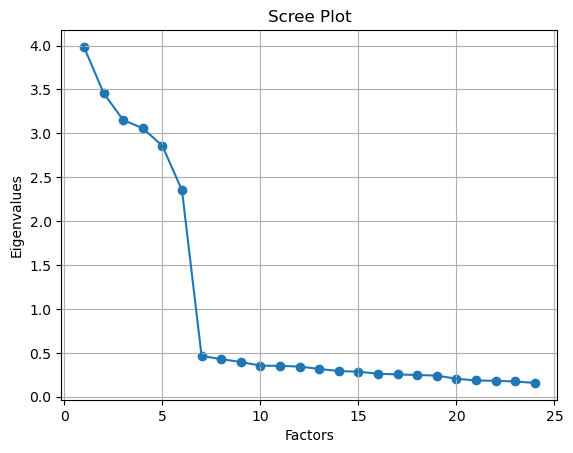

In [30]:
# Get the eigenvector and eigenvalues
ev,v=fa.get_eigenvalues()
# Scree plot
xvals=range(1,data1.shape[1]+1)
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

In [31]:
v  # Eigen-Values

array([ 3.71739199e+00,  3.19152878e+00,  2.87204918e+00,  2.79256300e+00,
        2.56832364e+00,  2.08387973e+00,  8.06694253e-02,  5.35674565e-02,
        4.24829075e-02,  3.96499494e-02,  2.58063421e-02,  1.77064093e-02,
        1.02441119e-02,  5.84320575e-03,  3.63239230e-03, -6.12087118e-03,
       -1.00708725e-02, -1.47593712e-02, -2.14180436e-02, -3.13829861e-02,
       -3.60115270e-02, -3.83279026e-02, -5.12590740e-02, -7.02514853e-02])

## 4- EFA Factor Loadings

In [32]:
#loadings
print(pd.DataFrame.from_records(loadings))

           0         1         2         3         4         5
0   0.053303  0.041876 -0.035970  0.012016  0.005155  0.753252
1   0.010415  0.054389 -0.005287 -0.011891 -0.016232  0.839124
2   0.055666 -0.019563 -0.017345  0.028846  0.006701  0.846040
3   0.018222  0.043070 -0.004790  0.014553  0.009649  0.866416
4   0.052930  0.024743 -0.011233 -0.006176  0.714839 -0.006758
5   0.057810  0.073786  0.040689 -0.006039  0.851565  0.011025
6   0.076549  0.056966 -0.000648  0.004010  0.856262 -0.000768
7   0.084564  0.043866  0.007931 -0.017210  0.914454  0.003244
8   0.763342 -0.036400 -0.024726  0.093981  0.065876  0.069582
9   0.891244 -0.003563 -0.011340  0.041645  0.051644  0.014672
10  0.840764  0.033658  0.012456  0.076376  0.079759  0.022545
11  0.904321 -0.003028  0.016939  0.065903  0.081672  0.037362
12  0.008052  0.770415 -0.053817  0.015935  0.025989  0.039242
13 -0.033103  0.878043 -0.012307 -0.003211  0.039016  0.024453
14  0.002137  0.832248 -0.011784  0.017889  0.066718  0

# Step 3: Measurement Model Analysis

## 1- GOF Indices for Measurement Model


Below are the required assessments for the GOF indices along with their threshold value:

<img src="GOF.png" width="600">

In [33]:
from factor_analyzer import FactorAnalyzer

In [34]:
## For  one-factor congeneric measurement for PEOU, PU,SI, FC, TOG, AB 
# Factor Analysis packages 
# To Run each factor, we will replace values in the following code "data.iloc[]""

#data3=data.iloc[0:,4:8] # For PEOU
#data3=data.iloc[0:,8:12] # For PU
#data3=data.iloc[0:,12:16] # For SI
#data3=data.iloc[0:,16:20] # For FC
#data3=data.iloc[0:,20:24] # For TOG
data3=data.iloc[0:,24:28] # For AB
data3.shape
fa1 = FactorAnalyzer(n_factors=1,rotation=None, rotation_kwargs={})
fa1.fit(data3)
loadings=-fa1.loadings_
# Get variance of each factors
a1=fa1.get_factor_variance()
a1[0], loadings

(array([2.8586282]),
 array([[0.82173054],
        [0.85207833],
        [0.80404206],
        [0.90048098]]))

In [35]:
from semopy import Model
## # To Run each factor, we will repalace in the code on mode2 
#mod2 = """ PEOU =~ PEOU1 + PEOU2 + PEOU3 + PEOU4 """
#mod2 = """ PU =~ PU1 + PU2 + PU3 + PU4 """
#mod2 = """ SI =~ SI1 + SI2 + SI3 + SI4 """
#mod2 = """ FC =~ FC1 + FC2 + FC3 + FC4 """
#mod2 = """ TOG=~ TOG1 + TOG2 + TOG3 + TOG4 """
mod2 = """ AB =~ ADOPT1 + ADOPT2 + ADOPT3 + ADOPT4 """

model2 = Model(mod2)
model2.fit(data3)
stats2 = semopy.calc_stats(model2)
print(stats2.T)
Results=model2.inspect(std_est=True)
pd.set_option('display.max_rows', Results.shape[0]+1)
print(Results)


                     Value
DoF               2.000000
DoF Baseline      6.000000
chi2              8.902700
chi2 p-value      0.011663
chi2 Baseline  2953.087718
CFI               0.997658
GFI               0.996985
AGFI              0.990956
NFI               0.996985
TLI               0.992973
RMSEA             0.055786
AIC              15.983959
BIC              56.080881
LogLik            0.008020
     lval  op    rval  Estimate  Est. Std  Std. Err    z-value p-value
0  ADOPT1   ~      AB  1.000000  0.818892         -          -       -
1  ADOPT2   ~      AB  1.040658  0.852944  0.031331  33.214776     0.0
2  ADOPT3   ~      AB  0.990464  0.806305  0.032259  30.703113     0.0
3  ADOPT4   ~      AB  1.244067  0.900271  0.034998  35.546631     0.0
4      AB  ~~      AB  1.066471  1.000000  0.065858  16.193495     0.0
5  ADOPT2  ~~  ADOPT2  0.432582  0.272486  0.024978  17.318347     0.0
6  ADOPT4  ~~  ADOPT4  0.385944  0.189511  0.028159  13.705894     0.0
7  ADOPT3  ~~  ADOPT3  0.56

In [36]:
# Calculating SRMR 
data3=pd.DataFrame(data3)
corr_Obs = np.corrcoef(data3 , rowvar=False)
lod = np.dot(loadings, loadings.T)
Corr_Exp = np.corrcoef(lod , rowvar=False)

In [37]:
# p is the number of items for the given factor
p=4
var=p*(p+1)/2
SRMR=np.sqrt(np.mean((corr_Obs-Corr_Exp)**2)/var)
print('SRMR value:', SRMR)

SRMR value: 0.07927496109532177


______________________________________________________________________________________________________________________

## ((We run the following part if the GOF values are not satisfactory, otherwise ignore it)) 

## One factor Congeneric Measurement Model

Below are the required assessments for the one-factor congeneric analysis along with their threshold value:

<img src="OneFactor.png" width="700">

### A- Stndardized Factor Loading SFL


In [38]:
Results=model2.inspect(std_est=True)
pd.set_option('display.max_rows', Results.shape[0]+1)
print(Results)

     lval  op    rval  Estimate  Est. Std  Std. Err    z-value p-value
0  ADOPT1   ~      AB  1.000000  0.818892         -          -       -
1  ADOPT2   ~      AB  1.040658  0.852944  0.031331  33.214776     0.0
2  ADOPT3   ~      AB  0.990464  0.806305  0.032259  30.703113     0.0
3  ADOPT4   ~      AB  1.244067  0.900271  0.034998  35.546631     0.0
4      AB  ~~      AB  1.066471  1.000000  0.065858  16.193495     0.0
5  ADOPT2  ~~  ADOPT2  0.432582  0.272486  0.024978  17.318347     0.0
6  ADOPT4  ~~  ADOPT4  0.385944  0.189511  0.028159  13.705894     0.0
7  ADOPT3  ~~  ADOPT3  0.563039  0.349873  0.029143  19.319797     0.0
8  ADOPT1  ~~  ADOPT1  0.523889  0.329415  0.027733  18.890441     0.0


### B- Stndardized Residuals

In [39]:
# Standardized Residuals (SR)
# the difference between both the observed and the estimated covariance.
lod = np.dot(loadings, loadings.T)
data3=pd.DataFrame(data3)
covariance  = np.cov(data3 , rowvar=False)
residuals =(covariance - lod)
#covariance 
print(residuals)

[[0.91657039 0.43235357 0.39968937 0.57004654]
 [0.43235357 0.86290232 0.38895471 0.61596324]
 [0.39968937 0.38895471 0.96409728 0.60872304]
 [0.57004654 0.61596324 0.60872304 1.22741945]]


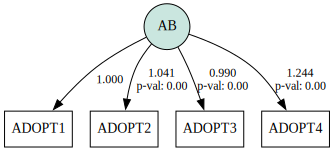

In [40]:
## For  one-factor congeneric measurement for the given factor
import graphviz

semopy.semplot(model2,"plot.jpeg")

## ((The end of the One factor Congeneric Measuremnt Model Analysis))

___

## 2- The Convergent Validity

Below are the required assessments for the convergent validity analysis along with their threshold value:

<img src="ConvergentValidity.png" width="700">

### A- Stndardized Factor Loading SFL


In [41]:
Results=model2.inspect(std_est=True)
pd.set_option('display.max_rows', Results.shape[0]+1)
print(Results)

     lval  op    rval  Estimate  Est. Std  Std. Err    z-value p-value
0  ADOPT1   ~      AB  1.000000  0.818892         -          -       -
1  ADOPT2   ~      AB  1.040658  0.852944  0.031331  33.214776     0.0
2  ADOPT3   ~      AB  0.990464  0.806305  0.032259  30.703113     0.0
3  ADOPT4   ~      AB  1.244067  0.900271  0.034998  35.546631     0.0
4      AB  ~~      AB  1.066471  1.000000  0.065858  16.193495     0.0
5  ADOPT2  ~~  ADOPT2  0.432582  0.272486  0.024978  17.318347     0.0
6  ADOPT4  ~~  ADOPT4  0.385944  0.189511  0.028159  13.705894     0.0
7  ADOPT3  ~~  ADOPT3  0.563039  0.349873  0.029143  19.319797     0.0
8  ADOPT1  ~~  ADOPT1  0.523889  0.329415  0.027733  18.890441     0.0


### B- Composite Reliability (CR)


In [42]:
# CR is are calculated via λ and E values.

# λ values are the standardized factor loading of the four items to the corresponding factor.
# E value is the respective error variance for item i.

# The formula of CR is = (sum of λ values)^2 / [(sum of λ values)^2 + (sum of E values)]
# The E value for each item is calculated as= 1- (λ value of that item)^2

In [43]:
## CR for PEOU Factor
lamda = (0.75+0.84+0.85+0.87)**2
Evalue =0.44+0.29+0.28+0.24
crPEOU = lamda/(lamda+Evalue)

print('CR_PE0U:' ,crPEOU)

CR_PE0U: 0.897592187512801


In [44]:
## CR for PU Factor
lamda = (0.71+0.85+0.86+0.92)**2
Evalue =0.50+0.28+0.26+0.15
crPU = lamda/(lamda+Evalue)

print('CR_PU:' ,crPU)

CR_PU: 0.9036093831000519


In [45]:
## CR for SI Factor
lamda = (0.77+0.89+0.85+0.91)**2
Evalue=0.41+0.21+0.28+0.17
crSI = lamda/(lamda+Evalue)

print('CR_SI:' ,crSI)

CR_SI: 0.9161862388770523


In [46]:
## CR for FC Factor
lamda = (0.77+0.88+0.84+0.92)**2
Evalue=0.41+0.23+0.29+0.15
crFC = lamda/(lamda+Evalue)

print('CR_FC:' ,crFC)

CR_FC: 0.9150148330592299


In [47]:
## CR for TOG Factor
lamda = (0.76+0.91+0.81+0.91)**2
Evalue=0.42+0.17+0.34+0.17
crTOG = lamda/(lamda+Evalue)

print('CR_TOG:' ,crTOG)

CR_TOG: 0.9126436416483351


In [48]:
## AB Factor
lamda = (0.82+0.85+0.81+0.90)**2
Evalue=0.33+0.28+0.34+0.19
crAB = lamda/(lamda+Evalue)

print('CR_AB:' ,crAB)

CR_AB: 0.9092674540765974


###  C- Average Variance Extracted (AVE)


In [49]:
# AVE is are calculated via via λ and E values.

# λ values are the standardized factor loading of the four items to the corresponding factor.
# E value is the variance of the error term for each item.

# The formula of AVE is = (the sum of squared λ values per each item) / [the sum of squared λ values per each item + (sum of E values)]
# The E value for each item is calculated as= 1- (λ value of that item)^2 

In [50]:
## AVE for PEOU Factor
lamda=0.75**2+0.84**2+0.85**2+0.87**2
Evalue =0.44+0.29+0.28+0.24
avePEOU = lamda/(lamda+Evalue)

print('AVE_PEOU:',avePEOU)

AVE_PEOU: 0.6873045653533458


In [51]:
## AVE for PU Factor
lamda=0.71**2+0.85**2+0.86**2+0.92**2
Evalue =0.50+0.28+0.26+0.15
avePU = lamda/(lamda+Evalue)

print('AVE_PU:',avePU)

AVE_PU: 0.7026932493878979


In [52]:
## AVE for SI Factor
lamda=0.77**2+0.89**2+0.85**2+0.91**2
Evalue=0.41+0.21+0.28+0.17
aveSI = lamda/(lamda+Evalue)

print('AVE_SI:',aveSI)

AVE_SI: 0.7328739764329938


In [53]:
## AVE for FC Factor
lamda=0.77**2+0.88**2+0.84**2+0.92**2
Evalue=0.41+0.23+0.29+0.15
aveFC = lamda/(lamda+Evalue)

print('AVE_FC:',aveFC)

AVE_FC: 0.7299527417298027


In [54]:
## AVE for TOG Factor
lamda=0.76**2+0.91**2+0.81**2+0.91**2
Evalue=0.42+0.17+0.34+0.17
aveTOG = lamda/(lamda+Evalue)

print('AVE_TOG:',aveTOG)

AVE_TOG: 0.7243038672648437


In [55]:
## AVE for AB Factor
lamda=0.82**2+0.85**2+0.81**2+0.90**2
Evalue=0.33+0.28+0.34+0.19
aveAB = lamda/(lamda+Evalue)

print('AVE_AB:',aveAB)

AVE_AB: 0.715071232191952


## 3- The Discriminant Validity

The required assessment for the discriminant validity is caculated by the square root of AVE for each independent factor. 

The square root of AVE of each factor should be greater than its correlation with other factors.

In [56]:
# Calculate the square root of AVE for each independent factor.
print('Discriminant validity of PEOU factor:',np.sqrt(avePEOU))
print('Discriminant validity of PU factor:',np.sqrt(avePU))
print('Discriminant validity of SI factor:',np.sqrt(aveSI))
print('Discriminant validity of FC factor:',np.sqrt(aveFC))
print('Discriminant validity of TOG factor:',np.sqrt(aveTOG))

Discriminant validity of PEOU factor: 0.8290383376861084
Discriminant validity of PU factor: 0.8382680057045586
Discriminant validity of SI factor: 0.8560805899172074
Discriminant validity of FC factor: 0.8543727182733556
Discriminant validity of TOG factor: 0.8510604369049496


# Step 4: Structural Model Analysis

## 1- GOF Indices for Structural Model

The same GOF indices are calculated for the structural model.

In [57]:
from semopy import Model
mod = """ PEOU =~ PEOU1 + PEOU2 + PEOU3+PEOU4
PU =~ PU1 + PU2 + PU3 + PU4
SI =~ SI1+ SI2 + SI3+ SI4
FC =~ FC1+ FC2 + FC3+ FC4
TOG =~ TOG1+ TOG2 + TOG3+ TOG4
AB =~ADOPT1+ADOPT2+ADOPT3+ADOPT4
# regressions
AB~PEOU
AB~PU
AB~SI
AB~FC
AB~TOG """
model = Model(mod)

In [58]:
model.fit(data)

SolverResult(fun=0.2911897855720844, success=True, n_it=34, x=array([ 1.19499566,  1.21294599,  1.31163783,  1.27650273,  1.27351265,
        1.50917473,  1.23365226,  1.10218763,  1.38997003,  1.29375882,
        1.16908007,  1.50456011,  1.35818798,  1.08677175,  1.39922151,
        1.04097752,  0.98847052,  1.24514235,  0.03060849, -0.05060231,
        0.17204091,  0.06462677,  0.09664568,  0.73294034,  0.46531207,
        0.5257804 ,  0.47630962,  0.48927769,  0.3859105 ,  0.58542008,
        0.33725599,  0.49829748,  0.61542385,  0.43194473,  0.43214854,
        0.42207026,  0.64575284,  0.38318391,  0.36696477,  0.58938776,
        0.44669461,  0.34785125,  0.30762379,  0.32367726,  0.56700645,
        0.52381527,  0.45030132,  1.02690605,  0.84438526,  0.0566134 ,
        0.09784375, -0.03549606,  0.00468224,  0.81569009,  0.00846862,
       -0.03280475,  0.06672578,  0.76311316,  0.01365229,  0.14005136,
        0.82893148,  0.0043703 ,  0.95728516]), message='Optimization term

In [89]:
stats = semopy.calc_stats(model)
print(stats.T)

                     Value
DoF             237.000000
DoF Baseline    276.000000
chi2            279.297972
chi2 p-value      0.030871
chi2 Baseline  1417.325016
CFI               0.962940
GFI               0.802940
AGFI              0.770512
NFI               0.802940
TLI               0.956841
RMSEA             0.053225
AIC             117.271938
BIC             253.281573
LogLik            4.364031


In [60]:
# Calculating SRMR 
from factor_analyzer import FactorAnalyzer

data1=data.iloc[0:,4:28]
fa2=FactorAnalyzer(n_factors=6, rotation="varimax")
fa2.fit(data1)
loadings=fa2.loadings_
corr_Obs = np.corrcoef(data1 , rowvar=False)
lod = np.dot(loadings, loadings.T)
Corr_Exp = np.corrcoef(lod , rowvar=False)

In [61]:
# p is the number of items/variables for the whole structural model
p=24
var=p*(p+1)/2
SRMR=np.sqrt(np.mean((corr_Obs-Corr_Exp)**2)/var)
print('SRMR value:', SRMR)

SRMR value: 0.013991317449202166


## 2- Path Analysis

Below are the required assessments for the path analysis along with their threshold value:

<img src="pathAnalysis.png" width="700">

In [62]:
insp=model.inspect(std_est=True)

pd.set_option('display.max_rows', insp.shape[0]+1)
print(insp)

      lval  op    rval  Estimate  Est. Std  Std. Err    z-value   p-value
0       AB   ~    PEOU  0.030608  0.026768   0.03742   0.817979  0.413369
1       AB   ~      PU -0.050602 -0.042803  0.038947  -1.299267  0.193852
2       AB   ~      SI  0.172041  0.162992  0.034919   4.926832  0.000001
3       AB   ~      FC  0.064627  0.057504  0.036567   1.767344  0.077171
4       AB   ~     TOG  0.096646  0.085203  0.036574   2.642456  0.008231
5    PEOU1   ~    PEOU  1.000000  0.754963         -          -         -
6    PEOU2   ~    PEOU  1.194996  0.836889  0.042221  28.303156       0.0
7    PEOU3   ~    PEOU  1.212946  0.846091  0.042372  28.626416       0.0
8    PEOU4   ~    PEOU  1.311638  0.870944  0.044547  29.443687       0.0
9      PU1   ~      PU  1.000000  0.714202         -          -         -
10     PU2   ~      PU  1.276503  0.853049  0.046636  27.371795       0.0
11     PU3   ~      PU  1.273513  0.863537  0.045987  27.692972       0.0
12     PU4   ~      PU  1.509175  0.92

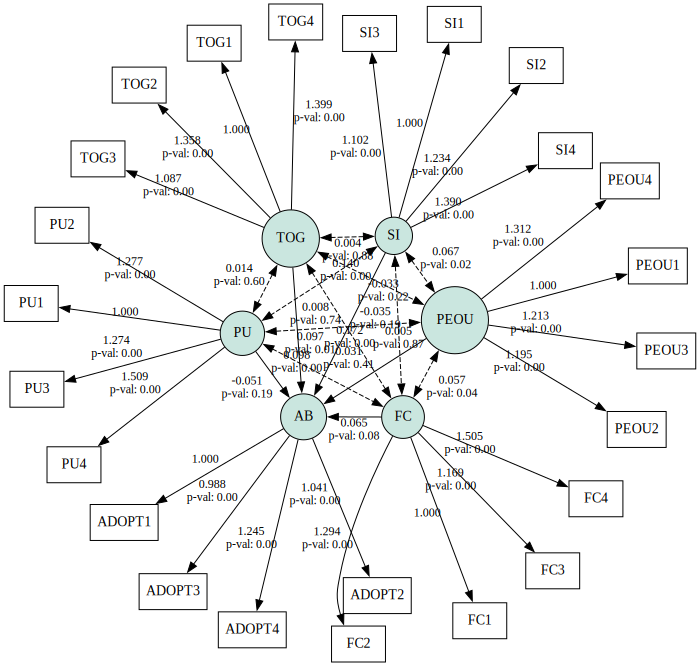

In [63]:
import graphviz

semopy.semplot(model,"plot_Data.jpeg", plot_exos=False, plot_covs=True,engine="neato")


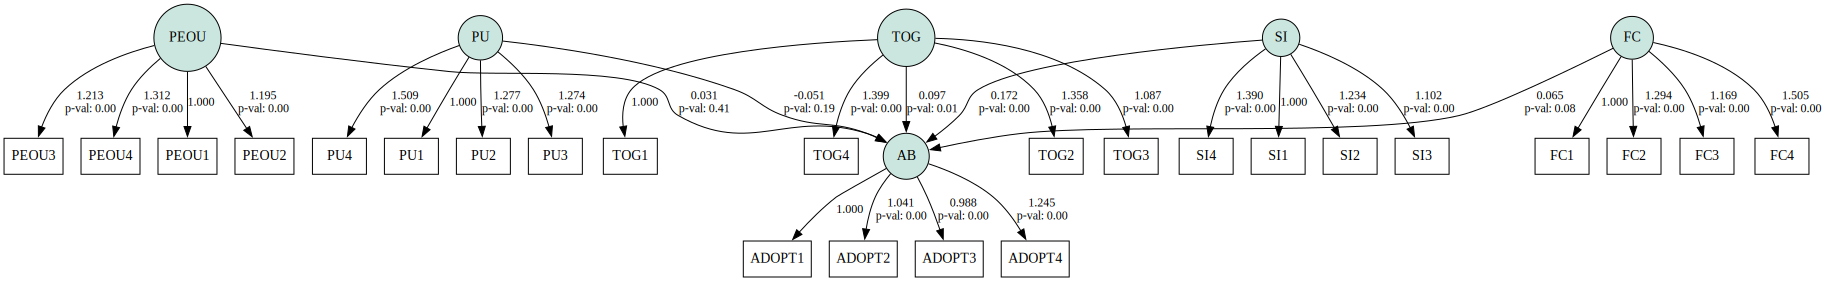

In [64]:
semopy.semplot(model,"plot.jpeg")

______________________________________________________________________________________________________________________

# ////// Extended Code for the Demogrphic Data //////

# A. Path Analysis per Gender

In [65]:
import pandas as pd
import csv
data0 = pd.read_csv('RawData.csv')
data = data0.dropna()
data.shape

(1110, 28)

In [66]:
#Model 1: For Male only
data = data[data["Gender"]==1]
###################################
# Model 2: For Female only
#data = data[data["Gender"]==2]
######################################
data.shape

(555, 28)

In [67]:
# measurement model
# The first step
from semopy import Model
mod = """ PEOU =~ PEOU1 + PEOU2 + PEOU3+PEOU4
PU =~ PU1 + PU2 + PU3 + PU4
SI =~ SI1+ SI2 + SI3+ SI4
FC =~ FC1+ FC2 + FC3+ FC4
TOG =~ TOG1+ TOG2 + TOG3+ TOG4
AB =~ADOPT1+ADOPT2+ADOPT3+ADOPT4
# regressions
AB~PEOU
AB~PU
AB~SI
AB~FC
AB~TOG """
model = Model(mod)

In [68]:
model.fit(data)
#
insp=model.inspect(std_est=True)
pd.set_option('display.max_rows', insp.shape[0]+1)
print(insp)

      lval  op    rval  Estimate  Est. Std  Std. Err    z-value   p-value
0       AB   ~    PEOU -0.069442 -0.058390  0.051755  -1.341725  0.179685
1       AB   ~      PU -0.178613 -0.138785  0.056987  -3.134265  0.001723
2       AB   ~      SI  0.380123  0.397160  0.043725   8.693572       0.0
3       AB   ~      FC -0.043990 -0.038075  0.049705  -0.885024  0.376144
4       AB   ~     TOG  0.058957  0.050100  0.050059   1.177742  0.238899
5    PEOU1   ~    PEOU  1.000000  0.740730         -          -         -
6    PEOU2   ~    PEOU  1.065929  0.810002  0.055649  19.154362       0.0
7    PEOU3   ~    PEOU  1.141915  0.816566  0.059103  19.320653       0.0
8    PEOU4   ~    PEOU  1.448393  0.925623  0.067279   21.52814       0.0
9      PU1   ~      PU  1.000000  0.707418         -          -         -
10     PU2   ~      PU  1.354206  0.873222  0.068999  19.626325       0.0
11     PU3   ~      PU  1.237329  0.844085  0.065097  19.007556       0.0
12     PU4   ~      PU  1.551784  0.93

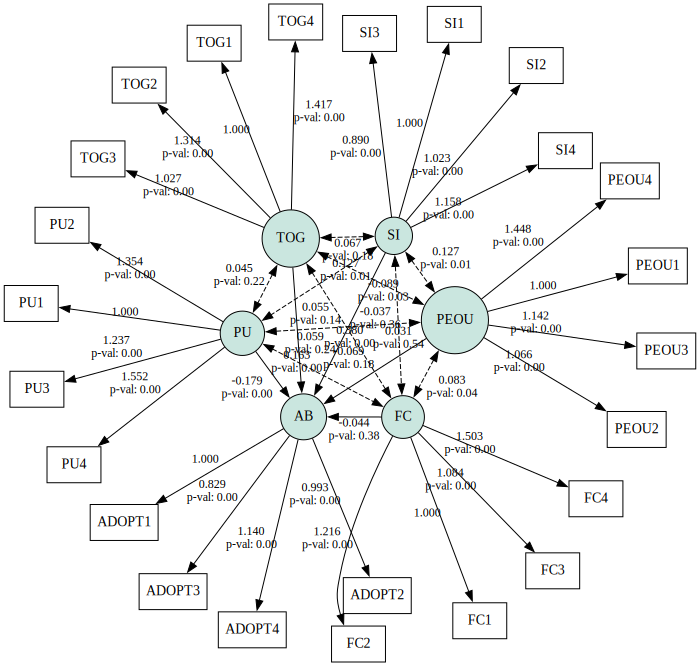

In [69]:
semopy.semplot(model,"plot_GenderData.jpeg", plot_exos=False, plot_covs=True,engine="neato")

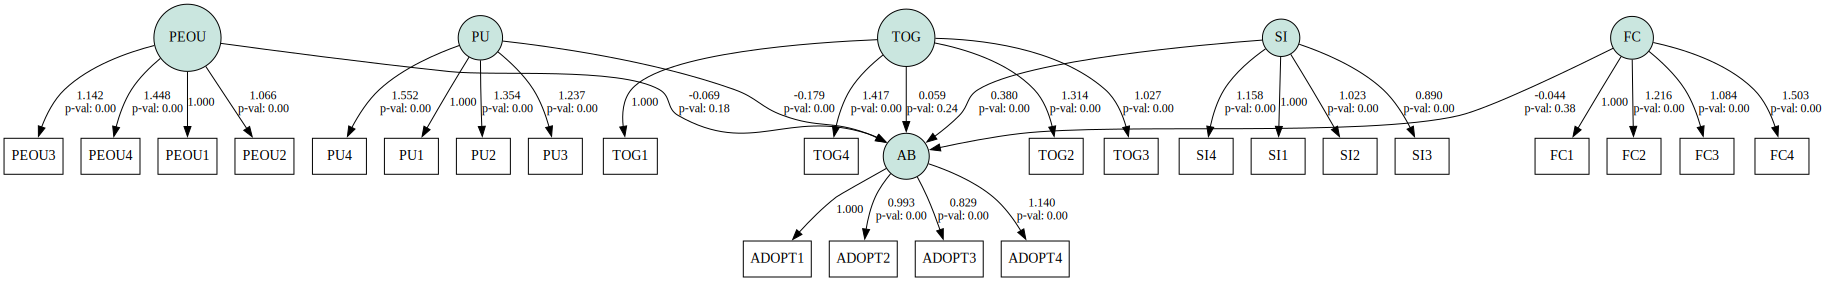

In [71]:
semopy.semplot(model,"Genderplot.jpeg")

# B.  Path Analysis per Education Level

In [72]:
import pandas as pd
import csv
data0 = pd.read_csv('RawData.csv')
data = data0.dropna()
data.shape

(1110, 28)

In [73]:
#Model 1: For Education evel: No formal school
#data = data[data["Education Level"]==1]
##################################
#Model 2: For Education evel: High school or less 
#data = data[data["Education Level"]==2]
##################################
#Model 3: For Education evel: Associate degree
#data = data[data["Education Level"]==3]
###################################
# Model 4: For Undergraduate degree
data = data[data["Education Level"]==4]
######################################
# Model 5: For Graduate degree
#data = data[data["Education Level"]==5]
data.shape

(345, 28)

In [74]:
# measurement model
# The first step
from semopy import Model
mod = """ PEOU =~ PEOU1 + PEOU2 + PEOU3+PEOU4
PU =~ PU1 + PU2 + PU3 + PU4
SI =~ SI1+ SI2 + SI3+ SI4
FC =~ FC1+ FC2 + FC3+ FC4
TOG =~ TOG1+ TOG2 + TOG3+ TOG4
AB =~ADOPT1+ADOPT2+ADOPT3+ADOPT4
# regressions
AB~PEOU
AB~PU
AB~SI
AB~FC
AB~TOG """
model = Model(mod)

In [75]:
model.fit(data)
#
insp=model.inspect(std_est=True)
pd.set_option('display.max_rows', insp.shape[0]+1)
print(insp)

      lval  op    rval  Estimate  Est. Std  Std. Err    z-value   p-value
0       AB   ~    PEOU  0.035317  0.040408  0.053208   0.663758  0.506845
1       AB   ~      PU  0.017932  0.016618  0.066741   0.268677  0.788178
2       AB   ~      SI  0.029764  0.028313  0.065673   0.453224  0.650387
3       AB   ~      FC  0.038156  0.038782  0.060784    0.62774  0.530174
4       AB   ~     TOG -0.033126 -0.031931  0.062074  -0.533652  0.593582
5    PEOU1   ~    PEOU  1.000000  0.812530         -          -         -
6    PEOU2   ~    PEOU  0.951673  0.834956  0.054928  17.325889       0.0
7    PEOU3   ~    PEOU  0.968915  0.833280  0.056064  17.282427       0.0
8    PEOU4   ~    PEOU  0.987000  0.841523  0.056417  17.494625       0.0
9      PU1   ~      PU  1.000000  0.703607         -          -         -
10     PU2   ~      PU  1.123236  0.823434  0.078141  14.374552       0.0
11     PU3   ~      PU  1.282455  0.893513  0.083034  15.444927       0.0
12     PU4   ~      PU  1.372142  0.89

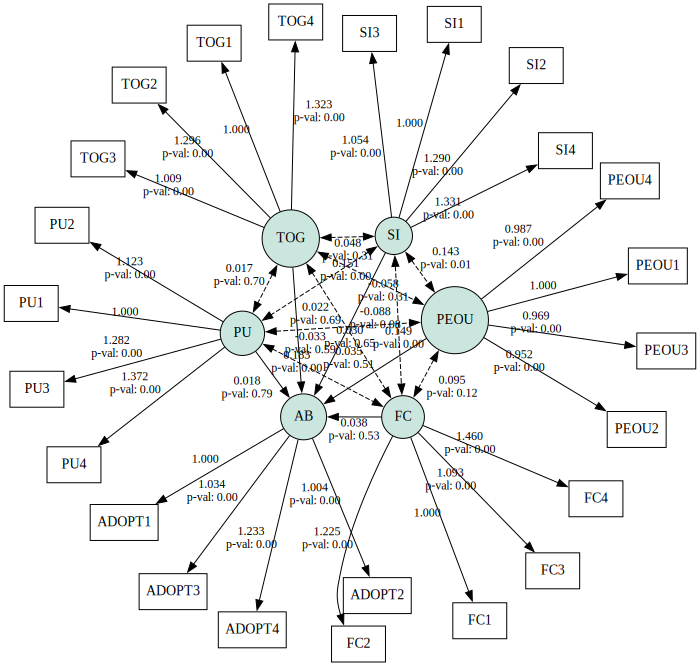

In [76]:
semopy.semplot(model,"plot_EducationLevelData.jpeg", plot_exos=False, plot_covs=True,engine="neato")

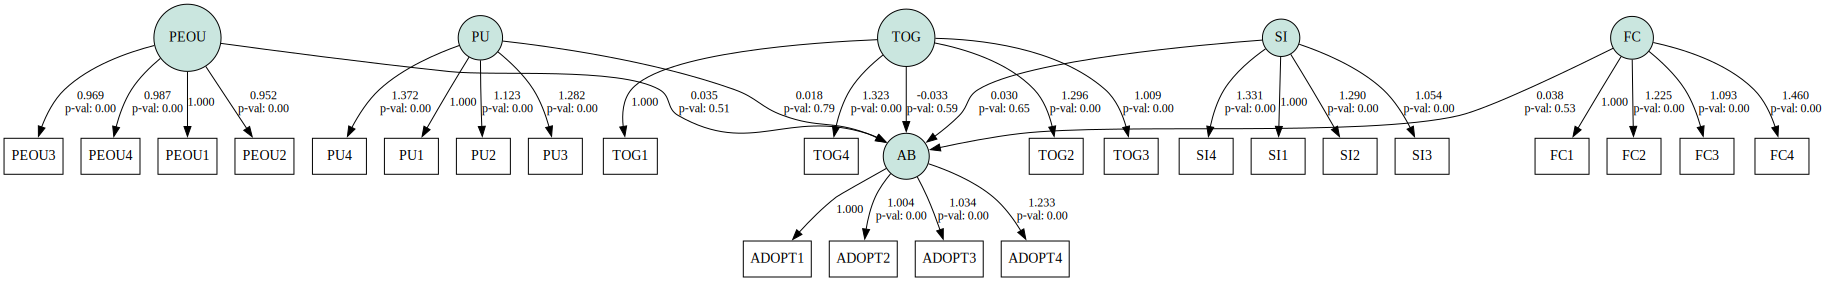

In [77]:
semopy.semplot(model,"Educationplot.jpeg")

# C.  Path Analysis per Age group

In [90]:
import csv
data0 = pd.read_csv('RawData.csv')
data = data0.dropna()
data.shape

(1110, 28)

In [79]:
#Model 1: For Age group: 18-30 years old
#data = data[data["Age Group"]==1]
##################################
#Model 2: For Age group: 31-40 years old
#data = data[data["Age Group"]==2]
###################################
# Model 3: For Age group: 41-50 years old
#data = data[data["Age Group"]==3]
######################################
# Model 4: For Age group: 51-60 years old
data = data[data["Age Group"]==4]
data.shape

(64, 28)

In [80]:
# measurement model
# The first step
from semopy import Model
mod = """ PEOU =~ PEOU1 + PEOU2 + PEOU3+PEOU4
PU =~ PU1 + PU2 + PU3 + PU4
SI =~ SI1+ SI2 + SI3+ SI4
FC =~ FC1+ FC2 + FC3+ FC4
TOG =~ TOG1+ TOG2 + TOG3+ TOG4
AB =~ADOPT1+ADOPT2+ADOPT3+ADOPT4
# regressions
AB~PEOU
AB~PU
AB~SI
AB~FC
AB~TOG """
model = Model(mod)

In [81]:
model.fit(data)
#
insp=model.inspect(std_est=True)
pd.set_option('display.max_rows', insp.shape[0]+1)
print(insp)

      lval  op    rval  Estimate  Est. Std  Std. Err   z-value   p-value
0       AB   ~    PEOU -0.193644 -0.165887  0.153852 -1.258637  0.208161
1       AB   ~      PU -0.098203 -0.091088  0.141976 -0.691685  0.489135
2       AB   ~      SI -0.216428 -0.164413  0.190954 -1.133404  0.257045
3       AB   ~      FC -0.006455 -0.004928   0.18069 -0.035724  0.971502
4       AB   ~     TOG  0.421476  0.290467  0.202646  2.079864  0.037538
5    PEOU1   ~    PEOU  1.000000  0.792620         -         -         -
6    PEOU2   ~    PEOU  1.451587  0.888118  0.181127  8.014193       0.0
7    PEOU3   ~    PEOU  1.444022  0.883483  0.181293  7.965114       0.0
8    PEOU4   ~    PEOU  1.346951  0.836863  0.181094  7.437853       0.0
9      PU1   ~      PU  1.000000  0.737550         -         -         -
10     PU2   ~      PU  1.258049  0.895216  0.169253   7.43297       0.0
11     PU3   ~      PU  1.576341  0.938314  0.201746  7.813483       0.0
12     PU4   ~      PU  1.538877  0.930305  0.19863

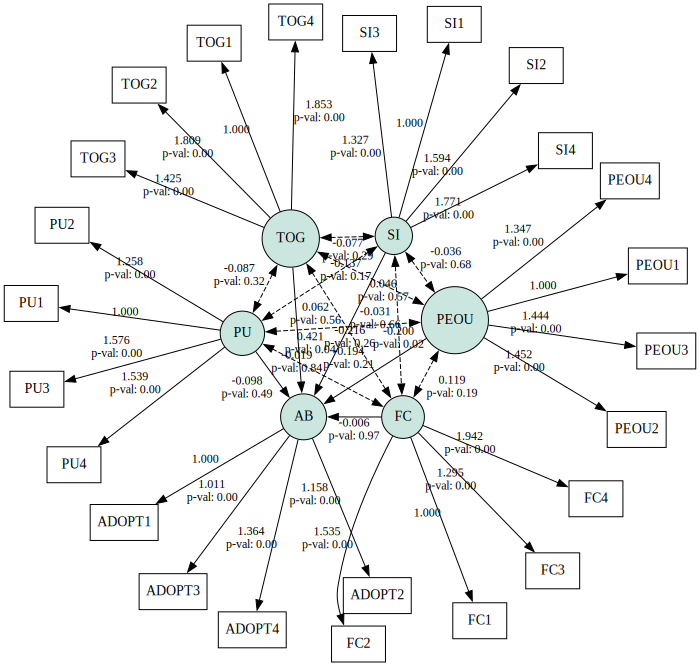

In [82]:
semopy.semplot(model,"AgeData.jpeg", plot_exos=False, plot_covs=True,engine="neato")

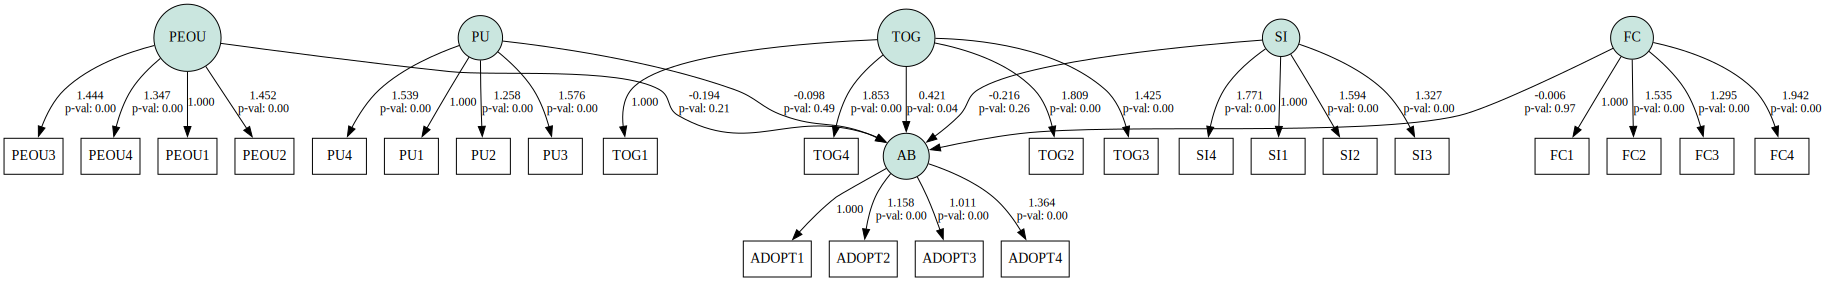

In [83]:
semopy.semplot(model,"Ageplot.jpeg")